### Importing Libraries 

In [1]:
import pm4py
import pandas as pd
import numpy as np
from colored import fg, bg
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils

## Import heuristics miner algorithm
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
# Import the heuristics net visualisation object
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

## Import the dfg_discovery algorithm
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
## Import the dfg visualization object
from pm4py.visualization.dfg import visualizer as dfg_visualization


## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
## Import the alpha_miner visualisation object
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.petri_net.util import performance_map 


### Preprocessing Dataset

In [2]:
# reading the csv file
df = pd.read_csv("/home/h532671/Documents/FLogs.csv")

  
# updating the column value/data
df['FUNCTIONALITY'] = df['FUNCTIONALITY'].astype(str).str.split(":")  

  
for x in range(len(df['FUNCTIONALITY'])):
    df['FUNCTIONALITY'][x] = "".join(df['FUNCTIONALITY'][x][2])  
    
print(df['FUNCTIONALITY'])
    
# writing into the file
df.to_csv("AllDetails.csv", index=False)

0      RemoteLoggingServiceUtil
1                           GWT
2                         Login
3                           GWT
4                   LandingPage
                 ...           
150       WarmupCachesProcessor
151       WarmupCachesProcessor
152    AnalysisChartDataCache$2
153    AnalysisChartDataCache$2
154    AnalysisChartDataCache$2
Name: FUNCTIONALITY, Length: 155, dtype: object


In [3]:
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df.head()

,DETAILS,ID,CREATED,USER,SEVERITY,CATEGORY,FUNCTIONALITY,MESSAGE,VIEW ANALYSIS,SCORE
0,Details,5'894'324,2023-03-28 07:53:41+00:00,REFACTORING_UI,Severe,System,RemoteLoggingServiceUtil,User: UI Refactoring (REFACTORING_UI),,-
1,Details,5'894'323,2023-03-28 07:53:48+00:00,REFACTORING_UI,Finest,Action,GWT,User: UI Refactoring (REFACTORING_UI),,-
2,Details,5'894'322,2023-03-28 07:53:44+00:00,NaN,Finest,Action,Login,IP: 195.138.130.158,,-
3,Details,5'894'321,2023-03-28 07:53:14+00:00,REFACTORING_UI,Finest,Action,GWT,User: UI Refactoring (REFACTORING_UI),,-
4,Details,5'894'320,2023-03-28 07:53:13+00:00,REFACTORING_UI,Finest,Action,LandingPage,User: UI Refactoring (REFACTORING_UI),,-


In [4]:
ndf = df[['USER','CREATED','FUNCTIONALITY']].copy()
ndf.rename(columns = {'USER':'case:concept:name', 'CREATED':'time:timestamp','FUNCTIONALITY':'concept:name'}, inplace = True)
ndf.head()

,case:concept:name,time:timestamp,concept:name
0,REFACTORING_UI,2023-03-28 07:53:41+00:00,RemoteLoggingServiceUtil
1,REFACTORING_UI,2023-03-28 07:53:48+00:00,GWT
2,NaN,2023-03-28 07:53:44+00:00,Login
3,REFACTORING_UI,2023-03-28 07:53:14+00:00,GWT
4,REFACTORING_UI,2023-03-28 07:53:13+00:00,LandingPage


## Alpha miner

In [5]:
log = log_converter.apply(ndf)

In [6]:
net, initial_marking, final_marking = alpha_miner.apply(log)

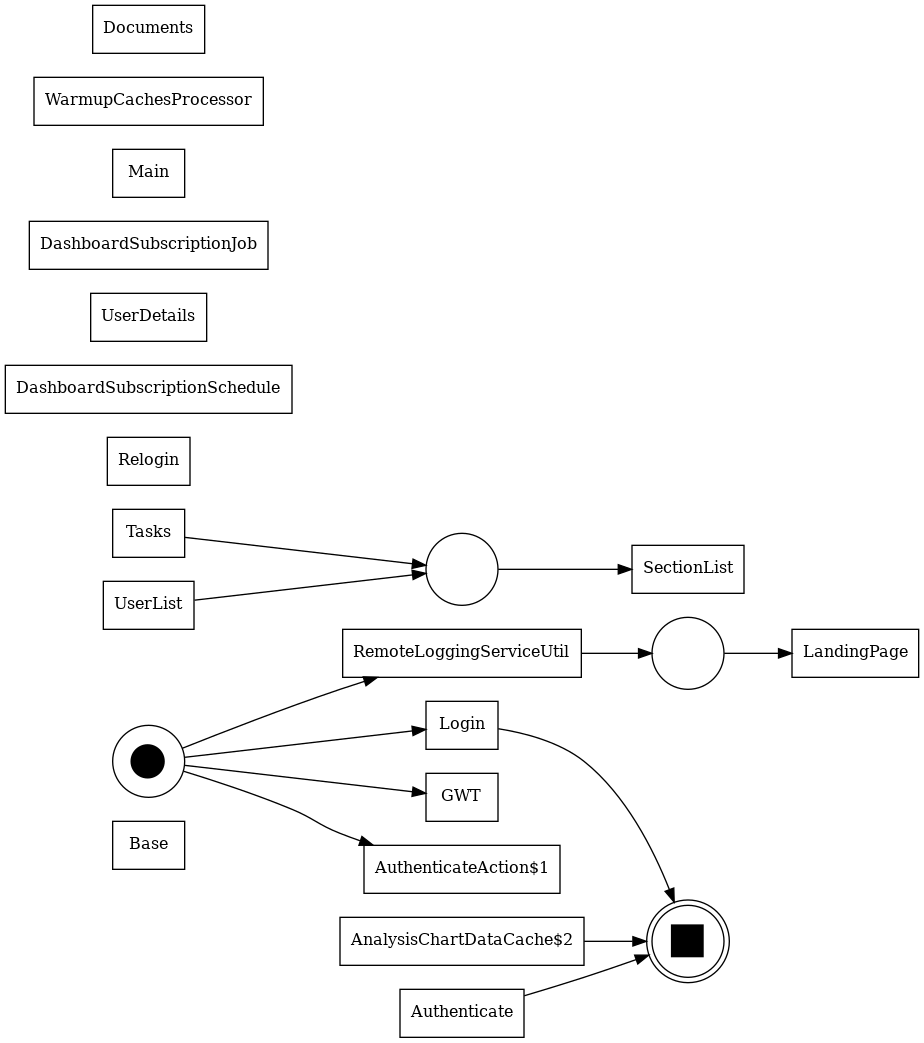

In [7]:
variant= pn_visualizer.Variants.FREQUENCY
gviz = pn_visualizer.apply(net, initial_marking, final_marking,variant=variant) 
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/5 [00:00<?, ?it/s]

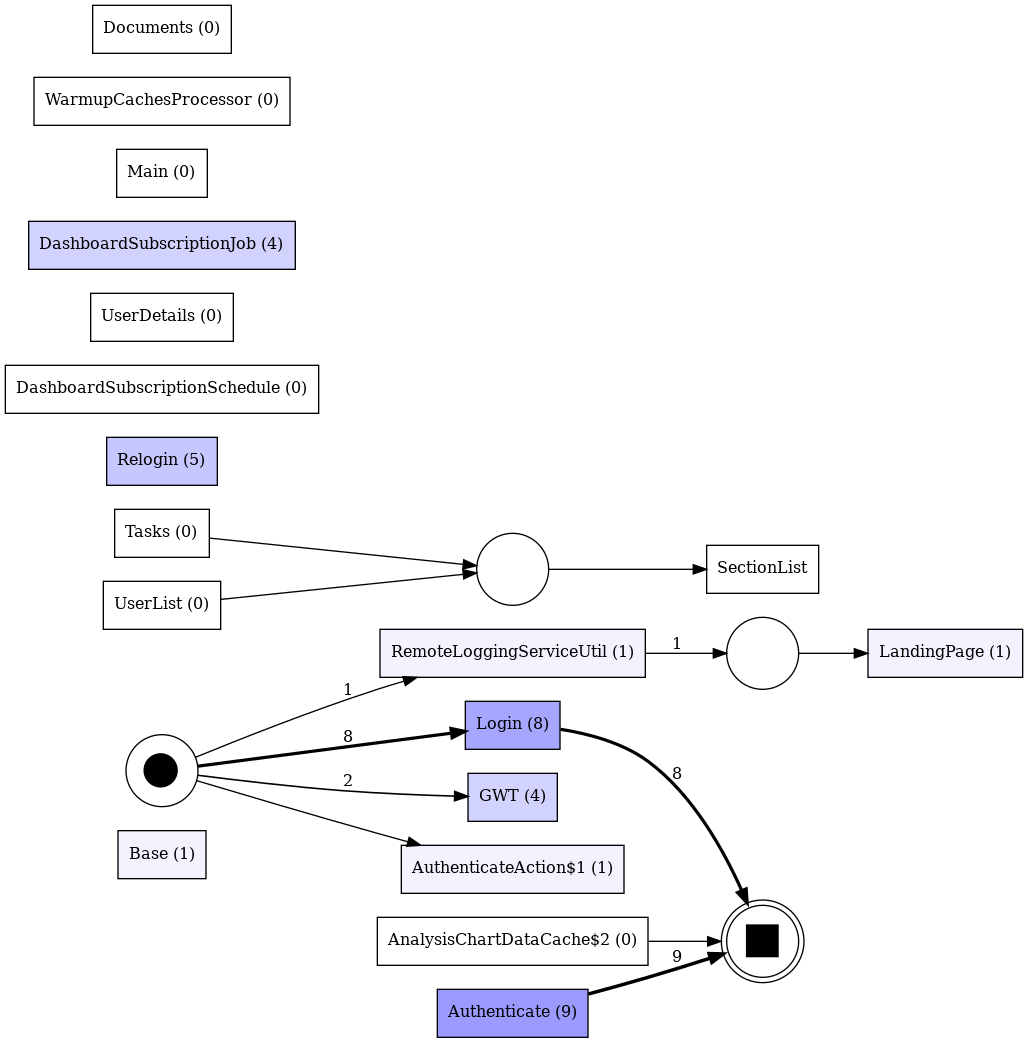

In [8]:
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

## Heuristics miner

In [9]:
heu_net = heuristics_miner.apply_heu(log)

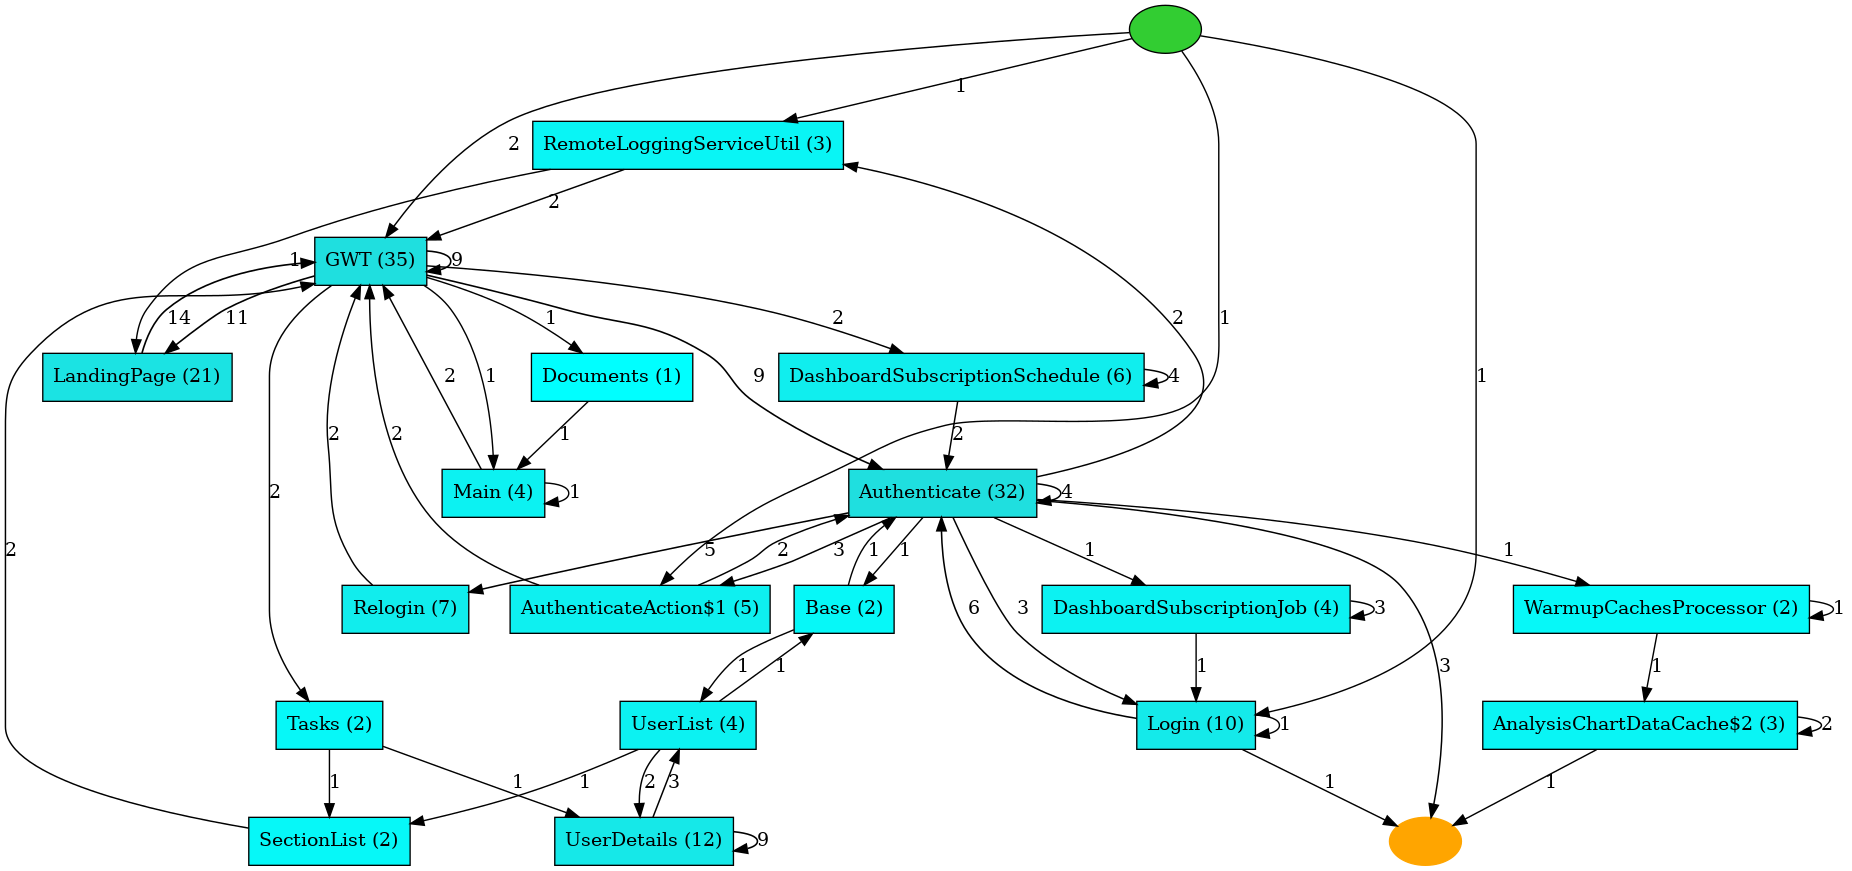

In [10]:
# Visualise model
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

## Dfg_discovery

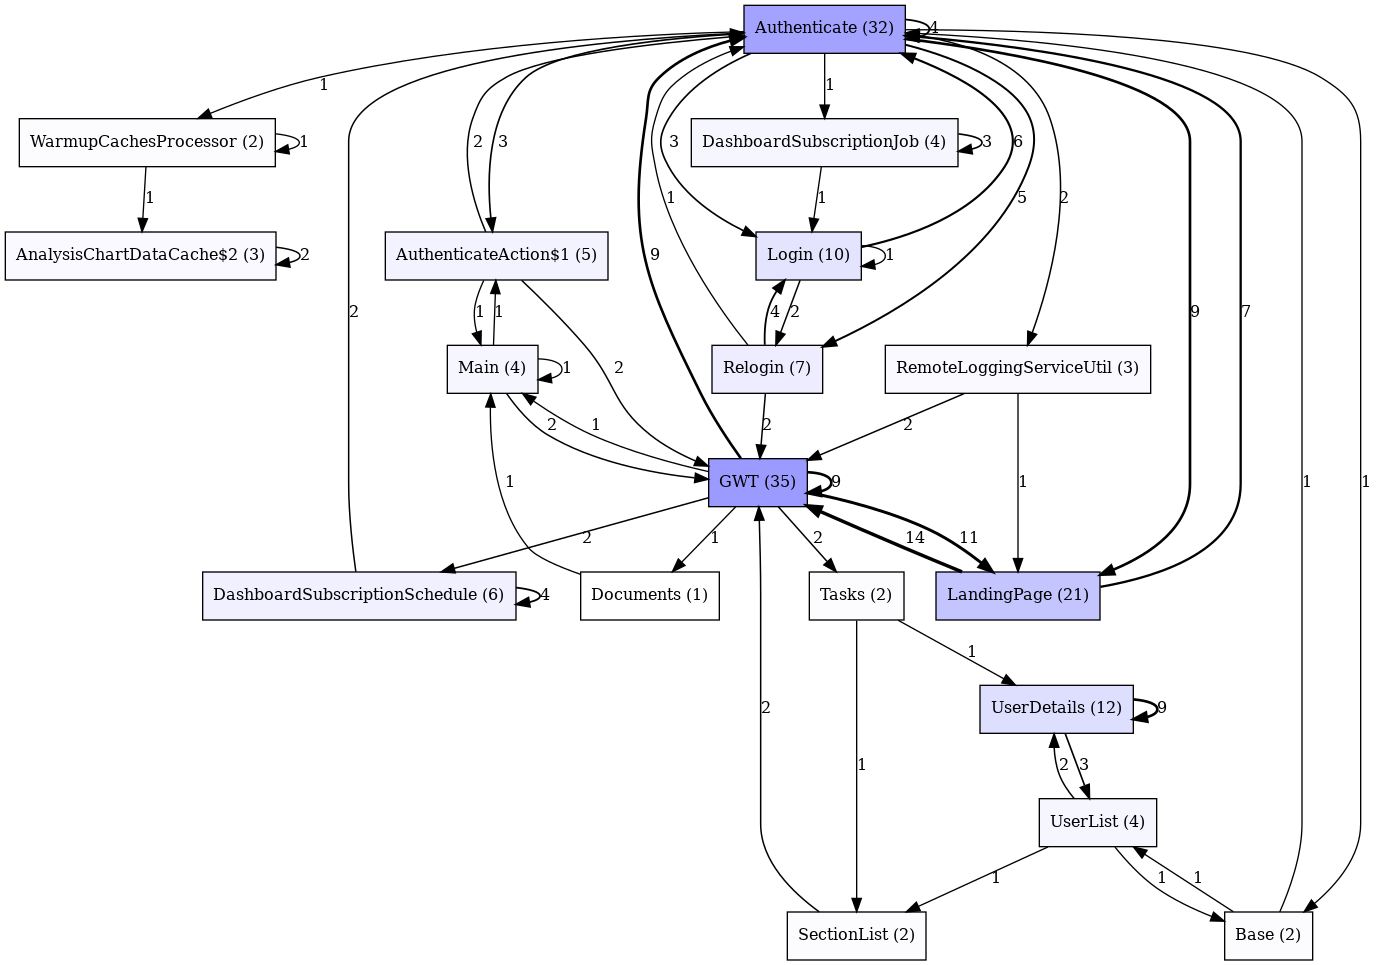

In [11]:
#Create graph from log
dfg = dfg_discovery.apply(log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [12]:
segment_user = ndf["case:concept:name"].unique()
print(segment_user)

['REFACTORING_UI' nan 'ADMIN' 'REFACTORING_ATLANTIS' 'DEMO_AVI_USER']


   case:concept:name            time:timestamp              concept:name
2                NaN 2023-03-28 07:53:44+00:00                     Login
6                NaN 2023-03-28 07:53:12+00:00              Authenticate
7                NaN 2023-03-28 07:53:12+00:00                      Base
8                NaN 2023-03-28 07:53:12+00:00              Authenticate
9                NaN 2023-03-28 07:53:12+00:00              Authenticate
10               NaN 2023-03-28 07:53:01+00:00  DashboardSubscriptionJob
11               NaN 2023-03-28 07:53:01+00:00  DashboardSubscriptionJob
12               NaN 2023-03-28 07:53:01+00:00  DashboardSubscriptionJob
13               NaN 2023-03-28 07:53:00+00:00  DashboardSubscriptionJob
14               NaN 2023-03-28 07:52:52+00:00                     Login
15               NaN 2023-03-28 07:52:52+00:00              Authenticate
16               NaN 2023-03-28 07:52:52+00:00                   Relogin
17               NaN 2023-03-28 07:52:37+00:00     

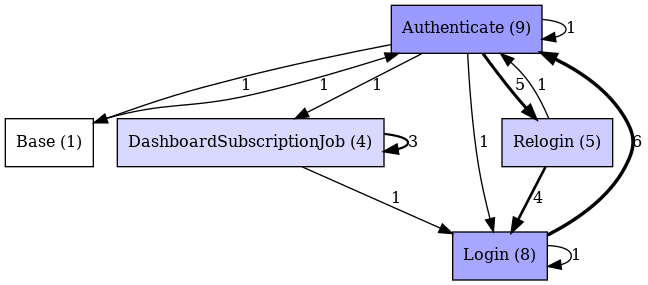

In [13]:
df1 = ndf[ndf['case:concept:name'].isnull()]
print(df1)
log = log_converter.apply(df1)
dfg = dfg_discovery.apply(log)
# Visualise
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

In [14]:
# grouping by particular dataframe column 
grouped = ndf.groupby(['case:concept:name'])


color = fg('honeydew_2') + bg('black')

PROCESS FLOW OF USER TYPE: REFACTORING_UI


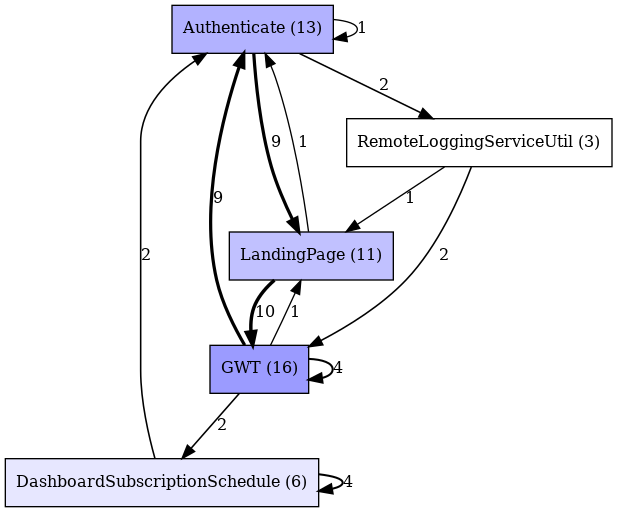

PROCESS FLOW OF USER TYPE: ADMIN


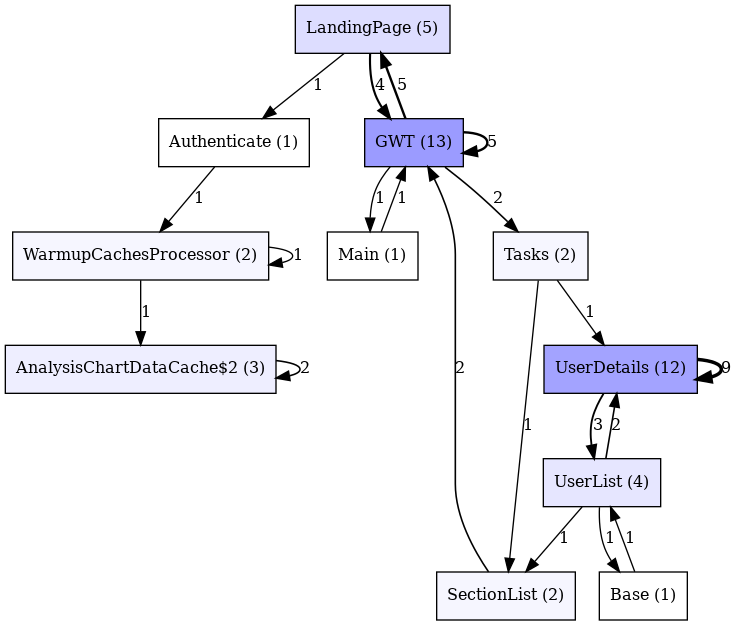

PROCESS FLOW OF USER TYPE: REFACTORING_ATLANTIS


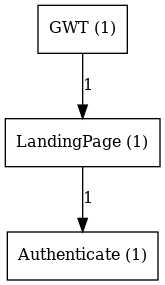

PROCESS FLOW OF USER TYPE: DEMO_AVI_USER


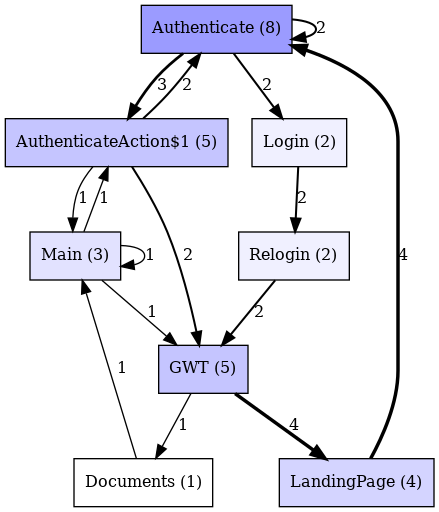

In [15]:
us = segment_user[np.logical_not(pd.isna(segment_user))]
for x in us:
    df1 = grouped.get_group(x)
#   print(df1)
    log = log_converter.apply(df1)
    dfg = dfg_discovery.apply(log)
    # Visualise
    print(color + 'PROCESS FLOW OF USER TYPE:', x)
    gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
    dfg_visualization.view(gviz)